In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("bottle_update.csv")
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salinity
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421


In [3]:
data = data[:][:400]
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salinity
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421


In [4]:
cdf = data[['Salinity','T_degC']]
cdf.head(15)

,Salinity,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
5,33.431,10.45
6,33.440,10.45
7,33.424,10.24
8,33.420,10.06
9,33.494,9.86


In [5]:
X=cdf['Salinity'].values
Y=cdf['T_degC'].values
mean_x = np.mean(X)
mean_y = np.mean(Y)
print(mean_x,mean_y)

33.55248621553884 8.05952380952381


In [6]:
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
a = numer / denom
b = mean_y - (a * mean_x)
print(a, b) #Regression coefficients
p=int(a)
q=int(b)
print(p, q)

-4.216087174755851 149.5197306240296
-4 149


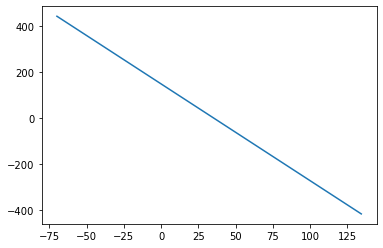

In [7]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = b + a * x 
plt.plot(x, y, label='This is Regression Line')

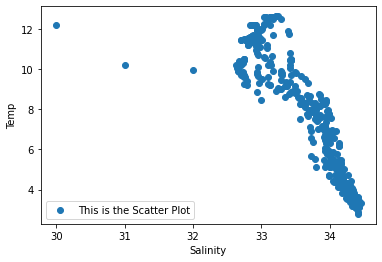

In [8]:
plt.scatter(X, Y, label='This is the Scatter Plot')
plt.xlabel('Salinity')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((p, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)
r2_score = reg.score(X, Y)
print(r2_score)

0.7718489772743439


In [10]:
A=cdf.iloc[:400,:-1].values
B=cdf.iloc[:400,1:2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(A,B, test_size=0.2, random_state=10)
print('Train size is',X_train.shape, y_train.shape)
print('Test size is',X_test.shape, y_test.shape)

Train size is (319, 1) (319, 1)
Test size is (80, 1) (80, 1)


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
print ('The coefficients are', reg.coef_)
print ('The intercept is',reg.intercept_)

The coefficients are [[-4.55136152]]
The intercept is [160.83489077]


In [12]:
predicted_y = reg.predict(X_test)
print(predicted_y[0:5])

[[ 5.68352803]
 [ 6.49822174]
 [11.50471941]
 [ 6.35257817]
 [ 4.47741723]]


In [13]:
y_normal=reg.predict(X_train)
print(y_normal[0:5])

[[ 5.33307319]
 [ 5.58794944]
 [11.18612411]
 [11.59574664]
 [ 4.78690981]]


In [14]:
accuracy1=reg.score(X_train,y_train)
print(accuracy1)

0.8100927636055316


Text(0, 0.5, 'Temperature')

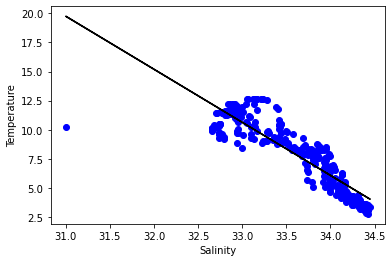

In [15]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.coef_[0][0]* X_train + reg.intercept_[0],'-k') 
plt.xlabel("Salinity")
plt.ylabel("Temperature")

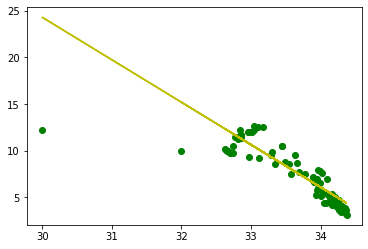

In [18]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test,predicted_y, color='y')
plt.show()